In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/Dataset/test/LSD/aa5.jpg
/kaggle/input/dataset/Dataset/test/LSD/a437.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_6243.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_7297.jpg
/kaggle/input/dataset/Dataset/test/LSD/a33.jpg
/kaggle/input/dataset/Dataset/test/LSD/a336.jpg
/kaggle/input/dataset/Dataset/test/LSD/a50.jpg
/kaggle/input/dataset/Dataset/test/LSD/a63.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_3017.jpg
/kaggle/input/dataset/Dataset/test/LSD/a408.jpg
/kaggle/input/dataset/Dataset/test/LSD/a679.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_8468.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_7416.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_5943.jpg
/kaggle/input/dataset/Dataset/test/LSD/a503.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_7488.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_8835.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_8050.jpg
/kaggle/input/dataset/Dataset/test/LSD/a732.jpg
/kaggle/input/dataset/Dataset/test/LSD

In [2]:
import math, re, os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from kaggle_datasets import KaggleDatasets
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE

# Detect TPU, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() 

print("REPLICAS: ", strategy.num_replicas_in_sync)

Tensorflow version 2.14.0
Running on TPU  
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


2023-11-23 12:35:49.552389: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:35:49.552496: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:35:49.552594: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:35:49.552687: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:35:49.552777: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:35:49.552964: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:35:49.553028: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


REPLICAS:  8


In [3]:
import tensorflow as tf

from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 2: Load the pre-trained VGG16 model without the top classification layers
IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS = 224, 224, 3
NUM_CLASSES = 4  # Change this to the number of classes in your dataset
with strategy.scope():
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS))

    # Step 3: Add custom classification layers on top of the base model
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Step 4: Freeze the layers of the pre-trained model
    for layer in base_model.layers:
        layer.trainable = False

# Step 5: Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Prepare your dataset
BATCH_SIZE = 32*strategy.num_replicas_in_sync
NUM_EPOCHS = 50

train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    rescale=1. / 255,
    validation_split=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/dataset/Dataset/train',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/kaggle/input/dataset/Dataset/test',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Step 7: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // BATCH_SIZE
)


2023-11-23 12:35:54.532617: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:35:54.532806: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


80134624/80134624 [==============================] - 1s 0us/step


Found 15157 images belonging to 4 classes.
Found 3827 images belonging to 4 classes.


2023-11-23 12:36:09.992529: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:36:10.008862: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:36:10.026021: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:36:10.043487: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:36:10.060681: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:36:10.077596: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:36:10.095327: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

Epoch 1/40


2023-11-23 12:36:13.107263: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2023-11-23 12:36:17.621654: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:36:17.628198: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:36:17.636996: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:36:17.638715: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


 1/59 [..............................] - ETA: 14:41 - loss: 1.6253 - accuracy: 0.1875

2023-11-23 12:36:25.621634: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:36:25.621758: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:36:25.621853: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:36:25.621961: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:36:25.622092: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:36:25.622191: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 12:36:25.622316: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

 5/59 [=>............................] - ETA: 1:59 - loss: 1.4690 - accuracy: 0.3281

2023-11-23 12:36:34.388287: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


 6/59 [==>...........................] - ETA: 2:16 - loss: 1.4485 - accuracy: 0.3392

2023-11-23 12:36:38.418542: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


 8/59 [===>..........................] - ETA: 2:33 - loss: 1.4053 - accuracy: 0.3564

2023-11-23 12:36:46.683770: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


 9/59 [===>..........................] - ETA: 2:37 - loss: 1.3924 - accuracy: 0.3607

2023-11-23 12:36:50.735855: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


11/59 [====>.........................] - ETA: 2:40 - loss: 1.3671 - accuracy: 0.3750

2023-11-23 12:36:59.039820: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


12/59 [=====>........................] - ETA: 2:41 - loss: 1.3494 - accuracy: 0.3877

2023-11-23 12:37:03.334770: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


17/59 [=======>......................] - ETA: 2:34 - loss: 1.2900 - accuracy: 0.4219

2023-11-23 12:37:24.350578: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


27/59 [============>.................] - ETA: 2:03 - loss: 1.1879 - accuracy: 0.4838

2023-11-23 12:38:05.600613: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


59/59 [==============================] - ETA: 0s - loss: 0.9263 - accuracy: 0.6214

2023-11-23 12:40:19.028881: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


59/59 [==============================] - 276s 5s/step - loss: 0.9263 - accuracy: 0.6214 - val_loss: 0.4319 - val_accuracy: 0.8242
Epoch 2/40
59/59 [==============================] - 193s 3s/step - loss: 0.4579 - accuracy: 0.8302 - val_loss: 0.2547 - val_accuracy: 0.9079
Epoch 3/40
59/59 [==============================] - 194s 3s/step - loss: 0.3439 - accuracy: 0.8716 - val_loss: 0.2492 - val_accuracy: 0.8982
Epoch 4/40
59/59 [==============================] - 194s 3s/step - loss: 0.2812 - accuracy: 0.8964 - val_loss: 0.1998 - val_accuracy: 0.9188
Epoch 5/40
59/59 [==============================] - 194s 3s/step - loss: 0.2545 - accuracy: 0.9051 - val_loss: 0.2086 - val_accuracy: 0.9166
Epoch 6/40
59/59 [==============================] - 193s 3s/step - loss: 0.2156 - accuracy: 0.9219 - val_loss: 0.1855 - val_accuracy: 0.9266
Epoch 7/40
59/59 [==============================] - 194s 3s/step - loss: 0.1993 - accuracy: 0.9259 - val_loss: 0.1952 - val_accuracy: 0.9194
Epoch 8/40
59/59 [======

Found 3827 images belonging to 4 classes.
3827/3827 [==============================] - 56s 15ms/step
Confusion Matrix:
[[ 606    0   18  106]
 [   1  612    3   14]
 [   0    0  952   16]
 [   6    1    9 1483]]

Classification Report:
              precision    recall  f1-score   support

         FMD       0.99      0.83      0.90       730
         IBK       1.00      0.97      0.98       630
         LSD       0.97      0.98      0.98       968
      Normal       0.92      0.99      0.95      1499

    accuracy                           0.95      3827
   macro avg       0.97      0.94      0.95      3827
weighted avg       0.96      0.95      0.95      3827



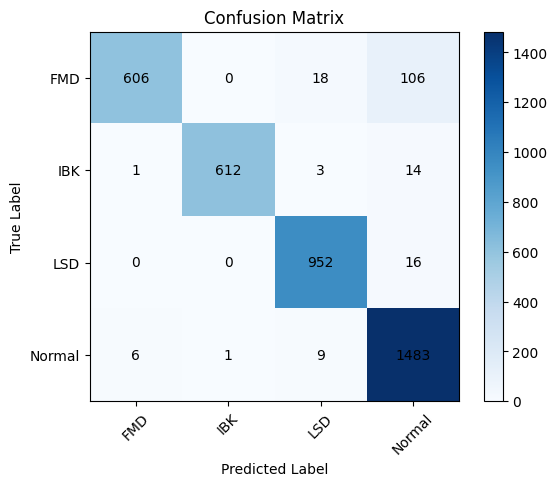

In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Step 8: Evaluate the model on the test data
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/dataset/Dataset/test',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Make predictions on the test data
y_pred = model.predict(test_generator, steps=len(test_generator))

# Convert one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true labels
y_true_labels = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
report = classification_report(y_true_labels, y_pred_labels, target_names=test_generator.class_indices.keys())

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(report)

def plot_confusion_matrix(confusion_matrix, labels, diagonal_color='darkblue', other_color='lightblue',text_color='black'):
    num_classes = len(labels)
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)

    # Highlight diagonal elements with a different color
    for i in range(num_classes):
        for j in range(num_classes):
            color = diagonal_color if i == j else other_color
            plt.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center', color=text_color)

    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks(np.arange(num_classes), labels, rotation=45)
    plt.yticks(np.arange(num_classes), labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Example usage
class_labels = ['FMD', 'IBK', 'LSD', 'Normal']
plot_confusion_matrix(conf_matrix, class_labels, diagonal_color='darkblue', other_color='lightblue')

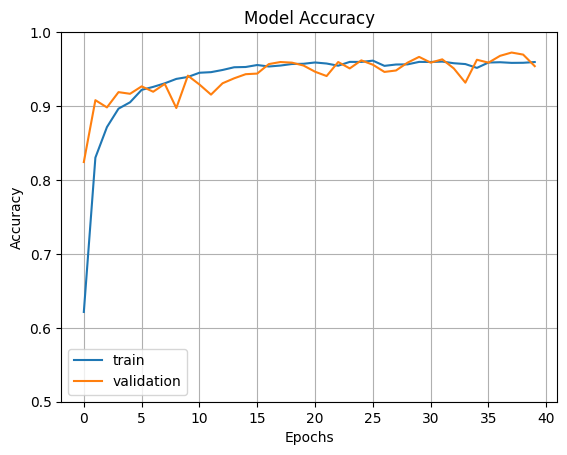

In [8]:
import matplotlib.pyplot as plt
fig1 = plt.gcf()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.axis(ymin=0.5,ymax=1)
plt.grid()
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
plt.show()

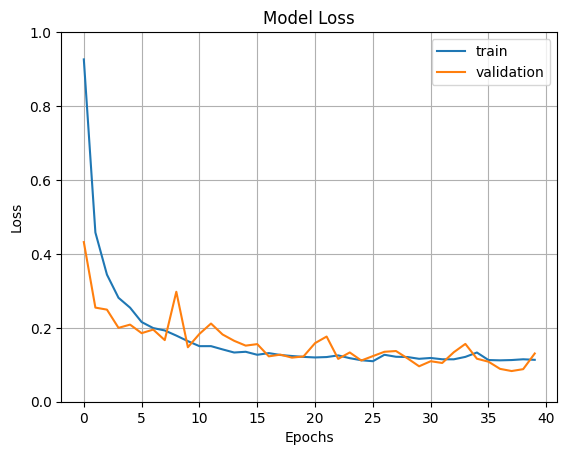

In [10]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
plt.show()

In [11]:
# Assuming your model is named 'custom_model'
model.save('/kaggle/working/model_Vgg19.h5')

/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
